In [2]:
# Import necessary libraries
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# os.chdir('/Users/gowtham/Documents/python/SCB/airflow/airflow_docker/')

In [49]:
# Extract the images

images_ = []
labels_ = []

dataset_path = 'C:\\Users\\azureuser\\Documents\\airflow\\airflow_docker\\dags\\data\\'
df = pd.DataFrame(columns=["file_name", "class", "image_path"])

try:
    # image_size = input("Enter the resizing width and height of the image(e.g., 128, 128): ")
    # # Validate user input for image size
    # image_size = eval(image_size)

    for labels in os.listdir(dataset_path + 'plant_images'):
        if labels != ".DS_Store":
            print(f"Processing class: {labels}")
            class_path = os.path.join(dataset_path + 'plant_images', labels)

            for img in os.listdir(class_path):
                image_path = os.path.join(class_path, img)
                # image = cv2.imread(image_path)

                # Resize the image using OpenCV's resize function
                # resized_image = cv2.resize(image, image_size)

                # Temporary list to store data for each image
                image_data = {"file_name": img, "class": labels, "image_path": image_path}

                # Append data using pd.concat (recommended approach)
                df = pd.concat([df, pd.DataFrame.from_dict([image_data])], ignore_index=True)

                df.to_csv("C:\\Users\\azureuser\\Documents\\airflow\\airflow_docker\\dags\\data\\preprocess\\image_data.csv")

except ValueError:
    print("Invalid input. Please enter image size as width,height (e.g., 128, 128).")
    exit()

# After processing all images, consider saving the DataFrame
# if len(df) > 0:
    # df.to_csv(dataset_path + "/preprocess_1/plant_image_data.csv", index=False)  # Save DataFrame as CSV


Processing class: corn_maize_common_rust
Processing class: potato_early_blight
Processing class: tomato_bacterial_spot


In [5]:
df.sample(10)

,file_name,class,image
114,RS_Rust 2584.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
156,RS_Rust 2626.JPG,corn_maize_common_rust,"[[[77, 97, 54], [81, 104, 60], [88, 110, 68], ..."
650,e5ebe0ed-8be8-46c8-a209-32b00ad5f65e___GCREC_B...,tomato_bacterial_spot,"[[[103, 103, 115], [113, 113, 125], [112, 112,..."
59,RS_Rust 2529.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
251,RS_Rust 2721.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
259,RS_Rust 2729.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
404,d03ee4f8-b77d-4f0f-8d13-d0a019a37a66___RS_Earl...,potato_early_blight,"[[[179, 165, 169], [182, 168, 172], [168, 154,..."
396,cf38c261-5bae-4b5d-92b4-16c634557d2a___RS_Earl...,potato_early_blight,"[[[162, 145, 148], [119, 102, 105], [117, 100,..."
755,f0765e3f-e21f-4b0f-ae02-0ac9de9cfb0e___GCREC_B...,tomato_bacterial_spot,"[[[98, 93, 108], [107, 102, 117], [120, 115, 1..."
78,RS_Rust 2548.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [6]:
df['file_name'].nunique

<bound method IndexOpsMixin.nunique of 0                                       RS_Rust 2469.JPG
1                                       RS_Rust 2470.JPG
2                                       RS_Rust 2471.JPG
3                                       RS_Rust 2472.JPG
4                                       RS_Rust 2473.JPG
                             ...                        
895    ff33b13d-9611-4c3e-bec9-a628055932b9___GCREC_B...
896    ffabbe39-4939-414b-af91-825f80fa4d4a___UF.GRC_...
897    ffb47323-2c7d-48ea-9c39-25a97e37d548___GCREC_B...
898    ffbff5e5-6c0a-4005-9974-1cb6ac61b4c9___UF.GRC_...
899    ffcf0c9e-f932-4836-b160-47277fbe124c___GCREC_B...
Name: file_name, Length: 900, dtype: object>

In [7]:
df1 = df[['file_name', 'class']]
df1.head()

,file_name,class
0,RS_Rust 2469.JPG,corn_maize_common_rust
1,RS_Rust 2470.JPG,corn_maize_common_rust
2,RS_Rust 2471.JPG,corn_maize_common_rust
3,RS_Rust 2472.JPG,corn_maize_common_rust
4,RS_Rust 2473.JPG,corn_maize_common_rust


In [8]:
df2 = df[['file_name', 'image']]
df2.head()

,file_name,image
0,RS_Rust 2469.JPG,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,RS_Rust 2470.JPG,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,RS_Rust 2471.JPG,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,RS_Rust 2472.JPG,"[[[4, 0, 0], [2, 0, 0], [2, 0, 0], [0, 2, 0], ..."
4,RS_Rust 2473.JPG,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [9]:
df = pd.merge(df1, df2, on='file_name')
df.sample(10)

,file_name,class,image
812,f5976cc5-521a-43c4-97ee-3abfdbb96ae9___GCREC_B...,tomato_bacterial_spot,"[[[119, 120, 134], [120, 121, 135], [130, 131,..."
28,RS_Rust 2498.JPG,corn_maize_common_rust,"[[[0, 0, 4], [0, 3, 8], [0, 0, 3], [0, 5, 7], ..."
22,RS_Rust 2491.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
655,e6d642b7-1313-4b97-b58b-eab8a92cae64___GCREC_B...,tomato_bacterial_spot,"[[[151, 154, 159], [149, 152, 157], [149, 152,..."
483,e0654927-6cc0-491f-86d3-acb5ad261904___RS_Earl...,potato_early_blight,"[[[193, 190, 205], [194, 191, 206], [195, 191,..."
787,f310847c-4d60-4212-babd-43d216cc8f88___UF.GRC_...,tomato_bacterial_spot,"[[[120, 115, 114], [121, 116, 115], [122, 117,..."
875,fca8f33c-6416-4ef3-91e8-8ea21346f242___GCREC_B...,tomato_bacterial_spot,"[[[152, 148, 159], [152, 148, 159], [151, 147,..."
702,eaf64b81-ac2a-4c85-8c15-da1986a12b7a___GCREC_B...,tomato_bacterial_spot,"[[[152, 144, 151], [156, 148, 155], [159, 151,..."
826,f7964e03-1651-4a72-8f28-be8626513372___GCREC_B...,tomato_bacterial_spot,"[[[158, 159, 169], [157, 158, 168], [156, 157,..."
647,e4ea3383-b5fc-45b6-a583-0363f632c3be___GCREC_B...,tomato_bacterial_spot,"[[[149, 149, 155], [151, 151, 157], [153, 153,..."


In [10]:
len(df)

900

In [11]:
df.isnull().sum()

file_name    0
class        0
image        0
dtype: int64

In [12]:
for col in df.columns:
    if df[col].isnull().any():
        print(f"Feature: {col} has null values")


In [13]:
# No missing values
# Vizualizing the images

def sample_img(df_val,n):
    df_val = df_val.sample(n)
    plt.figure(figsize=(20,20))
    for i,j in enumerate(df_val.iterrows()):
        plt.subplot(1,n,i+1)
        plt.imshow(j[1]['image'])
        plt.title("{}".format(j[1]['class'])) 

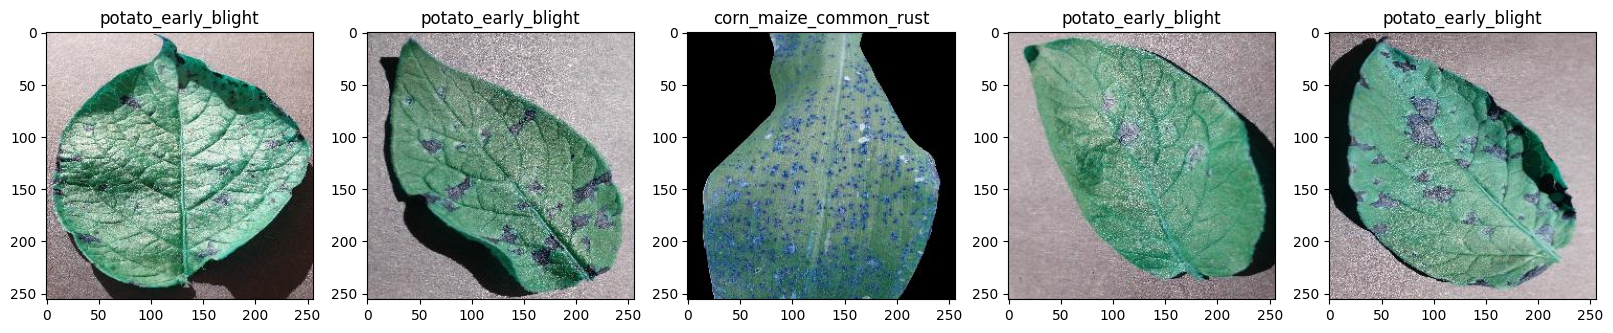

In [14]:
sample_img(df, 5)

In [15]:
# splitting dataset to train and test
from sklearn.model_selection import StratifiedShuffleSplit

# Define the class label column name (replace with your actual column name)
class_label = "class"

# Create a StratifiedShuffleSplit object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)  # Adjust test_size as needed

# Split the data into train and test sets (assuming your data is in a pandas DataFrame called df)
for train_index, test_index in sss.split(df, df[class_label]):
    train_dataset = df.iloc[train_index]
    test_dataset = df.iloc[test_index]

In [16]:
# Resizing the image suitable for model use
len(train_dataset)

720

In [17]:
train_dataset.shape

(720, 3)

In [18]:
type(train_dataset)

pandas.core.frame.DataFrame

In [19]:
# Reshaping train dataset suitable for the model
# For reshaping the image, we can do it if it is in the form of an array or liost

import cv2

image_list = []
resized_image_size = (128, 128)     # The image size can be dependent on the model
image = train_dataset['image']
label = train_dataset['class']

print(image.shape)
print(type(image))

for i, j in enumerate(image):
    img = cv2.resize(j, resized_image_size)      
    image_list.append(img)

(720,)
<class 'pandas.core.series.Series'>


In [20]:
label_list = []
for i, j in enumerate(label):
    # img = cv2.resize(j, resized_image_size)      
    label_list.append(j)

In [21]:
np.save('C:\\Users\\azureuser\\Documents\\airflow\\airflow_docker\\data\\preprocess_1\\image.npy', np.array(image_list), allow_pickle=True)

In [22]:
# Loading the array
loaded_arr = np.load('C:\\Users\\azureuser\\Documents\\airflow\\airflow_docker\\data\\preprocess_1\\image.npy')

# Print the loaded array
print(loaded_arr)

[[[[174 170 175]
   [171 167 172]
   [168 164 169]
   ...
   [135 131 136]
   [136 132 137]
   [137 133 138]]

  [[165 161 166]
   [168 164 169]
   [170 166 171]
   ...
   [134 130 135]
   [145 141 146]
   [145 141 146]]

  [[169 165 170]
   [170 166 171]
   [169 165 170]
   ...
   [141 137 142]
   [143 139 144]
   [139 135 140]]

  ...

  [[153 153 159]
   [147 147 153]
   [148 148 154]
   ...
   [122 121 131]
   [121 120 130]
   [119 118 128]]

  [[148 148 154]
   [148 148 154]
   [153 153 159]
   ...
   [110 109 119]
   [114 113 123]
   [119 118 128]]

  [[148 148 154]
   [148 148 154]
   [155 155 161]
   ...
   [115 114 124]
   [112 111 121]
   [110 109 119]]]


 [[[153 139 141]
   [160 146 148]
   [157 143 145]
   ...
   [135 120 124]
   [135 120 124]
   [133 118 122]]

  [[153 139 141]
   [158 144 146]
   [157 143 145]
   ...
   [135 120 124]
   [126 111 115]
   [139 124 128]]

  [[146 132 134]
   [153 139 141]
   [155 141 143]
   ...
   [132 117 121]
   [128 113 117]
   [130 115

In [40]:
np.save('C:\\Users\\azureuser\\Documents\\airflow\\airflow_docker\\data\\preprocess_1\\image.npy', np.array(label_list), allow_pickle=True)
loaded_label = np.load('C:\\Users\\azureuser\\Documents\\airflow\\airflow_docker\\data\\preprocess_1\\label.npy', allow_pickle=True)
print(loaded_label.copy())

[['tomato_bacterial_spot']
 ['potato_early_blight']
 ['tomato_bacterial_spot']
 ['potato_early_blight']
 ['potato_early_blight']
 ['potato_early_blight']
 ['corn_maize_common_rust']
 ['tomato_bacterial_spot']
 ['potato_early_blight']
 ['tomato_bacterial_spot']
 ['potato_early_blight']
 ['corn_maize_common_rust']
 ['potato_early_blight']
 ['corn_maize_common_rust']
 ['potato_early_blight']
 ['tomato_bacterial_spot']
 ['tomato_bacterial_spot']
 ['corn_maize_common_rust']
 ['potato_early_blight']
 ['potato_early_blight']
 ['potato_early_blight']
 ['potato_early_blight']
 ['potato_early_blight']
 ['tomato_bacterial_spot']
 ['tomato_bacterial_spot']
 ['potato_early_blight']
 ['potato_early_blight']
 ['tomato_bacterial_spot']
 ['corn_maize_common_rust']
 ['corn_maize_common_rust']
 ['potato_early_blight']
 ['corn_maize_common_rust']
 ['potato_early_blight']
 ['potato_early_blight']
 ['potato_early_blight']
 ['potato_early_blight']
 ['corn_maize_common_rust']
 ['potato_early_blight']
 ['corn_

In [41]:
len(loaded_label)

720

In [46]:
print(len(np.concatenate((loaded_label, loaded_label.copy()))))
x = np.concatenate((loaded_label, loaded_label.copy()))
x.shape

1440


(1440, 1)

In [23]:
loaded_arr.shape

(720, 128, 128, 3)

In [24]:
label.head()

662    tomato_bacterial_spot
544      potato_early_blight
672    tomato_bacterial_spot
456      potato_early_blight
468      potato_early_blight
Name: class, dtype: object

In [25]:
len(image_list)

720

In [26]:
# OpenCV reads images in BGR format by default when using cv2.imread()
# Few libraries like matplotlib and PIL expects image in 
image_rgb = []
for img in loaded_arr:
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image_rgb.append(image)

In [27]:
len(image_rgb)

720

In [29]:
image_array = np.array(image_rgb)
image_array.shape

(720, 128, 128, 3)

In [30]:
# Normalization

# converting the list to array
image_array = np.array(image_rgb)
image_norm = (image_array/255).astype('float32')

print(image_norm.shape)
print(image_norm.max(), image_norm.min())


(720, 128, 128, 3)
1.0 0.0


In [21]:
image_norm.shape

(720, 128, 128, 3)

In [22]:
image_flatten = image_norm.reshape(image_norm.shape[0], -1)
image_flatten.shape

(720, 49152)

In [23]:
type(image_flatten.shape[0])

int

In [24]:
image_reshape = image_flatten.reshape(image_flatten.shape[0], 128, 128, 3)
image_reshape.shape

(720, 128, 128, 3)

In [29]:
df_norm = pd.DataFrame(image_flatten)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,0.615686,0.576471,0.568627,0.639216,0.600000,0.592157,0.623529,0.584314,0.576471,0.607843,...,0.419608,0.470588,0.423529,0.423529,0.454902,0.407843,0.407843,0.454902,0.407843,0.407843
1,0.772549,0.764706,0.784314,0.780392,0.772549,0.792157,0.768627,0.760784,0.780392,0.780392,...,0.600000,0.572549,0.529412,0.545098,0.600000,0.556863,0.572549,0.576471,0.533333,0.549020
2,0.639216,0.611765,0.643137,0.650980,0.623529,0.654902,0.643137,0.615686,0.647059,0.627451,...,0.498039,0.517647,0.470588,0.486275,0.505882,0.458824,0.474510,0.505882,0.458824,0.474510
3,0.470588,0.462745,0.505882,0.454902,0.447059,0.490196,0.462745,0.454902,0.498039,0.458824,...,0.749020,0.698039,0.694118,0.749020,0.682353,0.678431,0.733333,0.678431,0.674510,0.729412
4,0.584314,0.541176,0.572549,0.690196,0.647059,0.678431,0.666667,0.623529,0.654902,0.647059,...,0.768627,0.741176,0.717647,0.733333,0.760784,0.737255,0.752941,0.764706,0.741176,0.756863


In [30]:
df_label = pd.DataFrame(label, columns=['class'])
df_label.head()

,class
662,tomato_bacterial_spot
244,potato_early_blight
672,tomato_bacterial_spot
156,potato_early_blight
168,potato_early_blight


In [37]:
len(df_label)

720

In [34]:
df_preprocess_ = df_norm.join(df_label)

In [36]:
df_preprocess_.head()

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,class
0,0.615686,0.576471,0.568627,0.639216,0.600000,0.592157,0.623529,0.584314,0.576471,0.607843,...,0.470588,0.423529,0.423529,0.454902,0.407843,0.407843,0.454902,0.407843,0.407843,potato_early_blight
1,0.772549,0.764706,0.784314,0.780392,0.772549,0.792157,0.768627,0.760784,0.780392,0.780392,...,0.572549,0.529412,0.545098,0.600000,0.556863,0.572549,0.576471,0.533333,0.549020,potato_early_blight
2,0.639216,0.611765,0.643137,0.650980,0.623529,0.654902,0.643137,0.615686,0.647059,0.627451,...,0.517647,0.470588,0.486275,0.505882,0.458824,0.474510,0.505882,0.458824,0.474510,potato_early_blight
3,0.470588,0.462745,0.505882,0.454902,0.447059,0.490196,0.462745,0.454902,0.498039,0.458824,...,0.698039,0.694118,0.749020,0.682353,0.678431,0.733333,0.678431,0.674510,0.729412,NaN
4,0.584314,0.541176,0.572549,0.690196,0.647059,0.678431,0.666667,0.623529,0.654902,0.647059,...,0.741176,0.717647,0.733333,0.760784,0.737255,0.752941,0.764706,0.741176,0.756863,potato_early_blight


In [31]:
# Standardization

mean = np.mean(image_array, axis=(0,1,2), keepdims=True)
std = np.std(image_array, axis=(0,1,2), keepdims=True)
image_std = (image_array - mean) / std

print(image_std.shape)
print(image_std.max(), image_std.min())

(720, 128, 128, 3)
2.9386476854816226 -2.0362860805494374


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5808326040662353..1.1950334461731027].


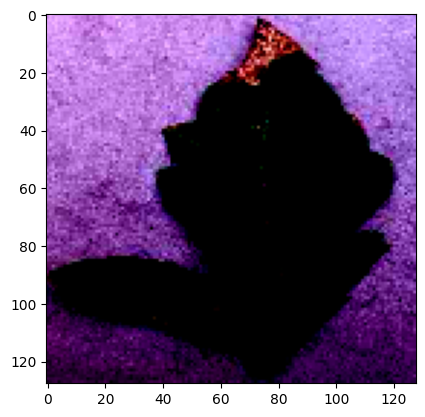

In [47]:
# Plotting a sample image befor cropping

image_to_plot = image_std[0]
plt.imshow(image_to_plot)
plt.show()


In [33]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Define augmentation pipeline
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=10, p=0.5),
    A.CropAndPad(percent=(-0.1, 0.1), p=1.0),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

# Apply transformations to an image
augmented = transform(image=image_std)
augmented_image = augmented['image']

OSError: [WinError 126] The specified module could not be found. Error loading "c:\Users\azureuser\Documents\airflow\airflow_docker\airflow-env\lib\site-packages\torch\lib\caffe2_nvrtc.dll" or one of its dependencies.

720


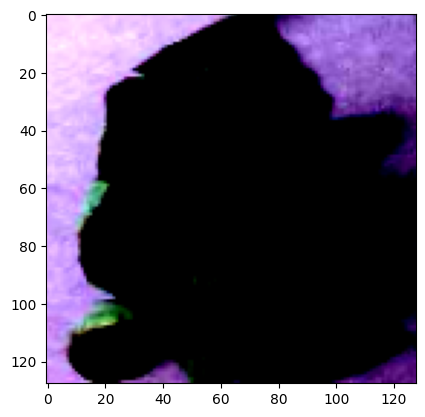

In [34]:
import imgaug as ia
from imgaug import augmenters as iaa

# Define augmentation sequence (replace with your desired transformations)
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Flip horizontally with 50% probability
    iaa.Rotate((-10, 10)),  # Rotate between -10 and 10 degrees
    iaa.Crop(percent=(0.0, 0.1))  # Randomly crop up to 10% of the image
])

# Load your image array (assuming your array is called "images")
original_images = image_array

# Augment the images
augmented_images = seq(images=image_std)
print(len(augmented_images))
img_to_plot = augmented_images[0]
plt.imshow(img_to_plot)
plt.show()


# Save the augmented images (replace "augmented_images.npy" with your desired filename)
# np.save("augmented_images.npy", augmented_images)


In [36]:
type(augmented_images)

numpy.ndarray

In [ ]:
# Define augmentation sequence (replace with your desired transformations)
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Flip horizontally with 50% probability
    iaa.Rotate((-10, 10)),  # Rotate between -10 and 10 degrees
    iaa.Crop(percent=(0.0, 0.1))  # Randomly crop up to 10% of the image
])

# Load your image array (assuming your array is called "images") and labels (assuming in a list called "labels")
original_images = images
original_labels = labels

# Augment the images
augmented_images = seq(images=original_images)

# Append augmented images and labels to originals (assuming labels have the same order as images)
augmented_images = np.concatenate((original_images, augmented_images))
augmented_labels = labels + labels.copy()  # Duplicate labels for augmented images

# Save the augmented data (replace with your desired filenames)
np.save("augmented_images.npy", augmented_images)
np.save("augmented_labels.npy", augmented_labels)


In [ ]:
# Augmentation: Rotation, Translation, Shearing, Zooming, Flipping, Cropping, Color Jittering
# Using Augmentor library or similar
import Augmentor

p = Augmentor.Pipeline()
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.zoom_random(probability=0.5, percentage_area=0.8)
p.flip_left_right(probability=0.5)
p.sample(1)

In [ ]:
# Download data from MinIO
downloaded_bytes = client.get_object(bucket_name, object_name).read()

# Convert bytes back to NumPy array
retrieved_array = np.frombuffer(downloaded_bytes, dtype=your_original_array_dtype)  # Replace with actual dtype


In [12]:
dataset_path = 'C:\\Users\\azureuser\\Documents\\airflow\\airflow_docker\\data'
data_path = dataset_path + '\\preprocess_1'

df1.to_csv(data_path + '\\df.csv')

In [1]:
import pandas as pd
import numpy as np
import cv2
import ast
from io import StringIO
from airflow.hooks.S3_hook import S3Hook

# Step 1: Read the CSV from Minio
s3_hook = S3Hook(aws_conn_id='minio_conn')

bucket_name = "airflow"
object_name = "airflow_testing/preprocess/plant_data.csv"

# Read data from S3
data_string = s3_hook.read_key(key=object_name, bucket_name=bucket_name)

# Convert data string to DataFrame
df_minio = pd.read_csv(StringIO(data_string))

# Print the first few rows to verify
print(df_minio.head())

# Step 2: Parsing the string representation of image data
def parse_image_string(image_string):
    try:
        # Use ast.literal_eval for safely evaluating string to list
        img_list = ast.literal_eval(image_string)
        img_array = np.array(img_list, dtype=np.uint8)
        return img_array
    except Exception as e:
        print(f"Error parsing image string: {e}")
        return None

# Step 3: Process and resize the images
image_list = []
resized_image_size = (128, 128)  # The desired image size

for index, row in df_minio.iterrows():
    image_data = row['image']
    img = parse_image_string(image_data)
    
    if img is not None:
        try:
            # Resize the image to 128x128
            resized_image = cv2.resize(img, resized_image_size)
            image_list.append(resized_image)
        except Exception as e:
            print(f"Warning: Could not resize image for row {index} due to {e}")
    else:
        print(f"Warning: Could not parse image for row {index}")

print('------ Images size after resizing as per the model requirement -------')
print(len(image_list))

if not image_list:
    raise ValueError("No images were processed successfully.")


c:\Users\azureuser\Documents\airflow\airflow_docker\airflow-env\lib\site-packages\airflow\__init__.py:35: RuntimeWarning: Airflow currently can be run on POSIX-compliant Operating Systems. For development, it is regularly tested on fairly modern Linux Distros and recent versions of macOS. On Windows you can run it via WSL2 (Windows Subsystem for Linux 2) or via Linux Containers. The work to add Windows support is tracked via https://github.com/apache/airflow/issues/10388, but it is not a high priority.
  warnings.warn(


DuplicateOptionError: While reading from 'C:\\Users\\azureuser\\Documents\\airflow\\airflow.cfg' [line 26]: option 'sql_alchemy_conn' in section 'core' already exists